<a href="https://colab.research.google.com/github/RicardoVictor/portfolio/blob/master/FinalWorkML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes Database

Previsão do início do diabetes com base em medidas de diagnóstico.

## Descrição

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Contextualização**

Este conjunto de dados é originalmente do National Institute of Diabetes and Digestive and Kidney Diseases (Instituto Nacional de Diabetes e Doenças Digestivas e Renais). O objetivo do conjunto de dados é prever se um paciente tem ou não diabetes, com base em determinadas medidas de diagnóstico contidas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias em um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade da herança indígena Pima.

Os conjuntos de dados consistem em várias variáveis ​​de previsão médica e uma variável de destino (Outcome). As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

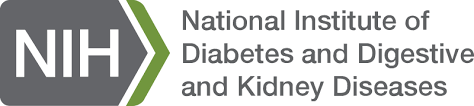

**Data**

1. Number of times pregnant (NP).
2. Plasma glucose concentration after 2 h in an OGTT.
3. Diastolic blood pressure (mmHg) (DBP).
4. Triceps skinfold thickness (mm) (TSFT).
5. Two-hour serum insulin (μU/mL) (2HSI).
6. BMI.
7. Diabetes pedigree function (DPF).
8. Age (years) (AGE).

**Dados**

número de gestações que a paciente teve, seu IMC, nível de insulina, idade


1. Número de gestações que a paciente teve.
2. Concentração de glicose no sangue após 2 horas da ingestão de um líquido com quantidade conhecida de glicose.
3. Pressão sanguínea diastólica (mmHg).
4. Prega cutânea do tríceps (mm).
5. Insulina sérica de duas horas / nível de insulina (μU/mL).
6. IMC.
7. Diabetes Pedigree Function (DPF) (valores que medem a tendência ao desenvolvimento de diabetes com base nas relações genéticas do indivíduo).
8. Idade (em anos).

## Imports

In [ ]:
import numpy as np  
import pandas as pd  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from math import floor
from sklearn.preprocessing import StandardScaler
%matplotlib inline

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams.update({'font.size': 10})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown --id "142QBKc_jGKfGEsJX4sxaCNm2v32lwIFq"

Downloading...
From: https://drive.google.com/uc?id=142QBKc_jGKfGEsJX4sxaCNm2v32lwIFq
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 20.2MB/s]


In [ ]:
df = pd.read_csv('diabetes.csv')

## Análise

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts().sort_index()

0    500
1    268
Name: Outcome, dtype: int64

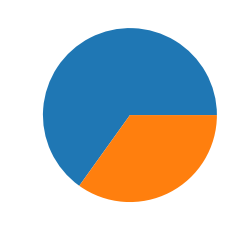

In [ ]:
df['Outcome'].value_counts().sort_index().plot(kind='pie')
plt.show()

**Histogramas de distribuição dos dados**

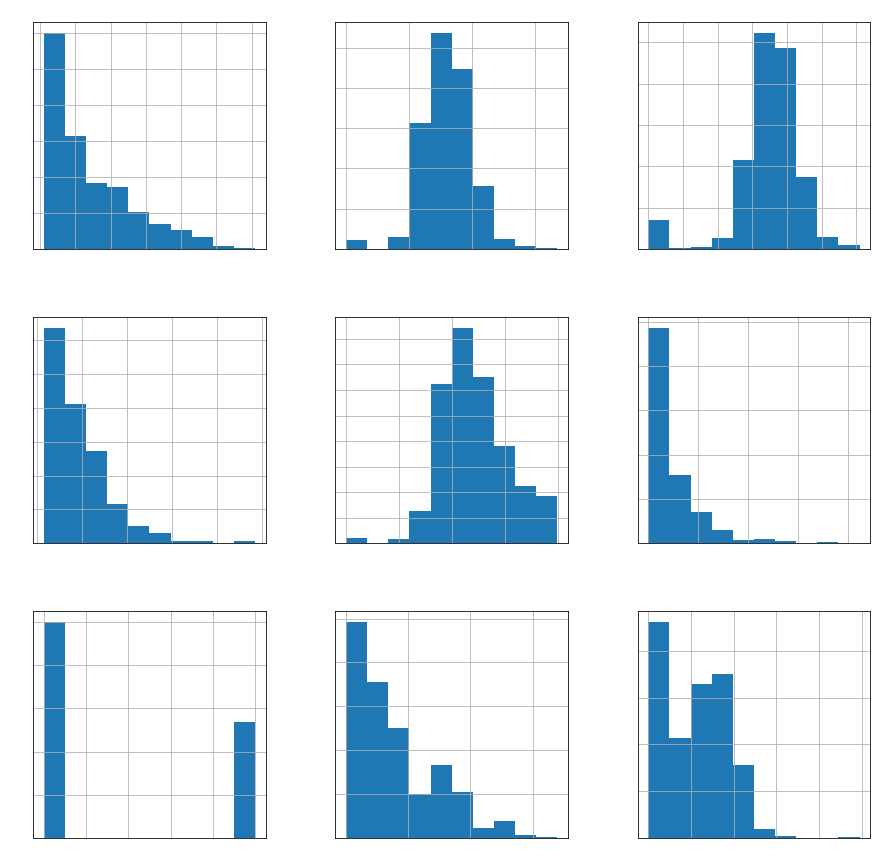

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

### Correlações

In [ ]:
corr = df.corr()
outcome = corr.iloc[:,8:9]
outcome

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


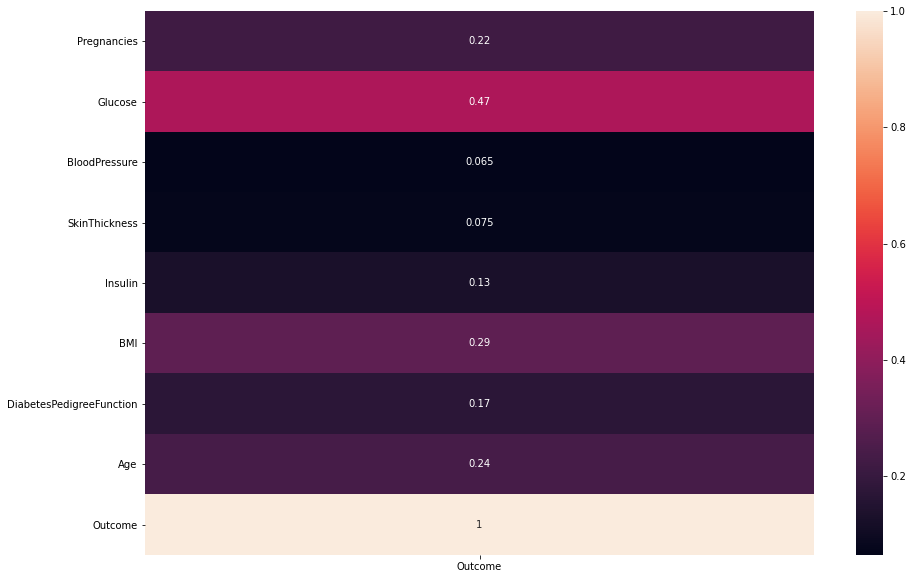

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(outcome, annot=True)
plt.show()

### Gráfico de pares

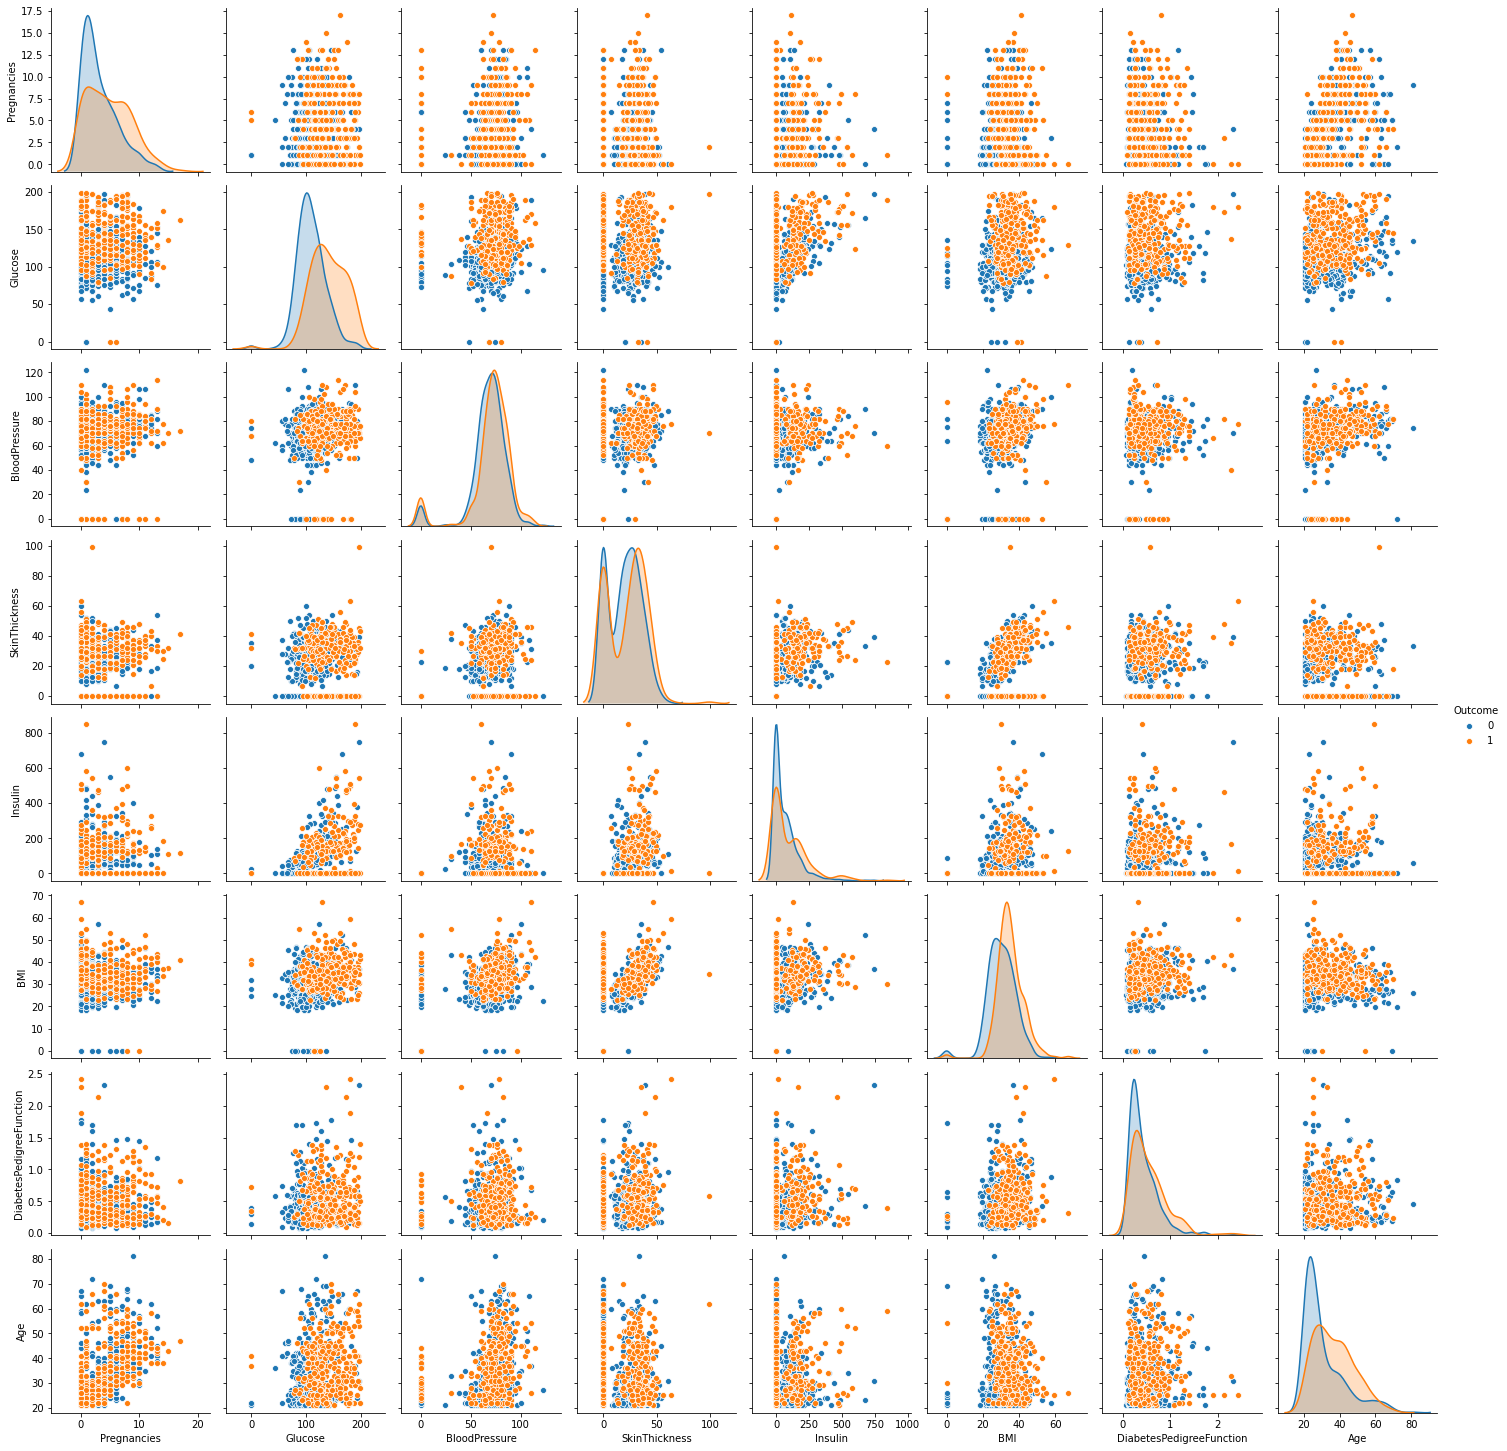

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.show()

### Dados iguais a zero

In [ ]:
df[df.Pregnancies == 0].shape[0]

111

In [ ]:
df[df.Glucose == 0].shape[0]

5

In [ ]:
df[df.BloodPressure == 0].shape[0]

35

In [ ]:
df[df.SkinThickness == 0].shape[0]

227

In [ ]:
df[df.Insulin == 0].shape[0]

374

In [ ]:
df[df.BMI == 0].shape[0]

11

In [ ]:
df[df.DiabetesPedigreeFunction == 0].shape[0]

0

In [ ]:
df[df.Age == 0].shape[0]

0

### Investigação de possíveis outliers

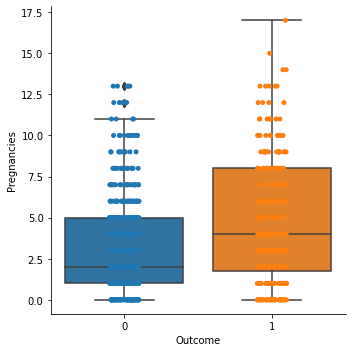

In [ ]:
sns.catplot(x='Outcome', y='Pregnancies', kind='box', data=df)
sns.stripplot(x='Outcome', y='Pregnancies', data=df, size=5)
plt.show()

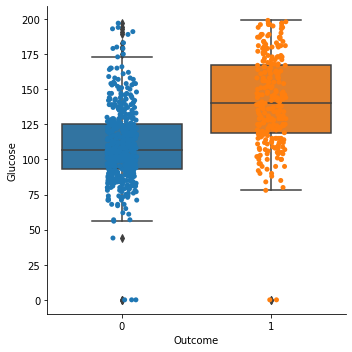

In [ ]:
sns.catplot(x='Outcome', y='Glucose', kind='box', data=df)
sns.stripplot(x='Outcome', y='Glucose', data=df)
plt.show()

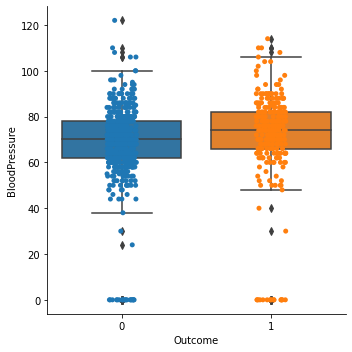

In [ ]:
sns.catplot(x='Outcome', y='BloodPressure', kind='box', data=df)
sns.stripplot(x='Outcome', y='BloodPressure', data=df)
plt.show()

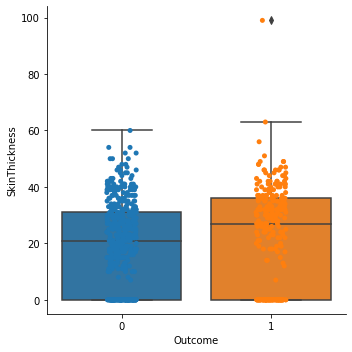

In [ ]:
sns.catplot(x='Outcome', y='SkinThickness', kind='box', data=df)
sns.stripplot(x='Outcome', y='SkinThickness', data=df)
plt.show()

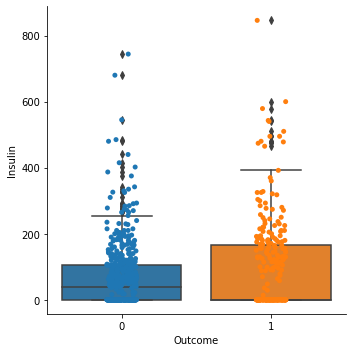

In [ ]:
sns.catplot(x='Outcome', y='Insulin', kind='box', data=df)
sns.stripplot(x='Outcome', y='Insulin', data=df)
plt.show()

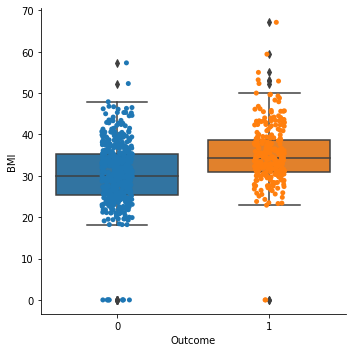

In [ ]:
sns.catplot(x='Outcome', y='BMI', kind='box', data=df)
sns.stripplot(x='Outcome', y='BMI', data=df)
plt.show()

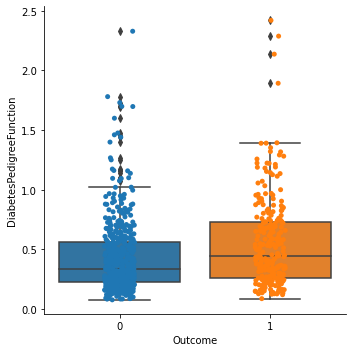

In [ ]:
sns.catplot(x='Outcome', y='DiabetesPedigreeFunction', kind='box', data=df)
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.show()

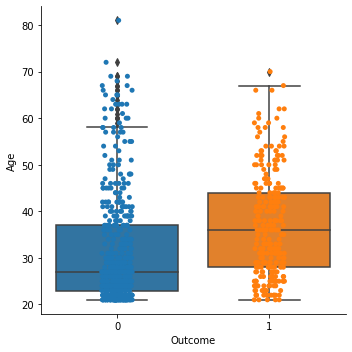

In [ ]:
sns.catplot(x='Outcome', y='Age', kind='box', data=df)
sns.stripplot(x='Outcome', y='Age', data=df)
plt.show()

# Metodologia

Texto explicando a metodologia utilizada.

# Tratamento

## Imputação de valores "faltantes" (iguais a zero)


**Tratamento de valores inconsistentes em datasets**

Possíveis soluções:

  - Corrigir manualmente os valores um a um.

  - Apagar coluna onde houver valores inconsistentes.

  - Apagar somente os registros com valores inconsistentes.

  - Substituir valores inconsistentes pela média dos valores consistentes.



### Atributo "Insulin"

In [ ]:
df.loc[df['Insulin']<=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


Média dos valores de insulina maiores que zero

In [ ]:
df['Insulin'][df.Insulin > 0].mean()

155.5482233502538

Substitui dados de insulina com valores menor ou igual zero pela média dos valores maiores que zero

In [ ]:
df.loc[df.Insulin <= 0, 'Insulin'] = df['Insulin'][df.Insulin > 0].mean()

## Deleção de registros com atributos iguais a zero

Deleção para os atributos BloodPressure, BMI e Glucose

In [ ]:
df = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

# Pré-processamento

## Separação do dataset em previsores(X) e classe (y)

In [ ]:
# set X (training data) and y (target variable)
n_features = len(df.columns)-1 

X = np.array(df.drop('Outcome', 1)) 
y = df.iloc[:,n_features:n_features+1].values

## Divisão de dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Escalonamento dos dados

### Escalonamento do zero

In [ ]:
def normalization(X, y=None):

    x_normal = X / np.mean(X, axis=0)
  
    if y is not None:
        y_normal = y / np.mean(y)
  
        return x_normal, y_normal
    
    return x_normal

In [ ]:
def z_score(X):
  return np.mean(X, axis=0), np.std(X, axis=0)

In [ ]:
def padronization(X, mean, std):
  x_normal = (X - mean) / std
  return x_normal

In [ ]:
mean_train, std_train = z_score(X_train)
X_train = padronization(X_train, mean_train, std_train)
X_test = padronization(X_test, mean_train, std_train)

### Escalonamento com sklearn

In [ ]:
#scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.transform(X))

# Algoritmos auxiliares

## K-fold cross-validation

In [ ]:
def kfoldcv(model, X, y, cv=5):
    
    acuracy_vals = np.array([])
    cols, _ = X.shape
    floor(cols/cv) * (cv-1)

    X_aux1 = X[floor(cols/cv) * (cv-1):]
    X_aux2 = X[:floor(cols/cv) * (cv-1)]
    y_aux1 = y[floor(cols/cv) * (cv-1):]
    y_aux2 = y[:floor(cols/cv) * (cv-1)]
    
    lista_X = np.split(X_aux2, cv-1)
    lista_X.append(X_aux1)

    lista_y = np.split(y_aux2, cv-1)
    lista_y.append(y_aux1)

    for i in range(cv):

        X_test = lista_X[i]
        y_test = lista_y[i]

        X_train = lista_X[:]
        del(X_train[i])
        X_train = np.concatenate((X_train))

        y_train = lista_y[:]
        del(y_train[i])
        y_train = np.concatenate((y_train))

        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        
        acuracy_vals = np.append(acuracy_vals, metrics.accuracy_score(prediction, y_test))

    return acuracy_vals

# KNN

In [ ]:
class KNNClassifier(object):
  def __init__(self, n_neighbors):
        self.k = n_neighbors
        self.X_train = n_neighbors
        self.y_train = n_neighbors

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  
  def predict(self, X_test):
    y_pred = np.array([])
    for i in range(len(X_test)):
      pred = self.Pointpredict(X_test[i])
      y_pred = np.append(y_pred,pred)
    return y_pred

  def Pointpredict(self, point):
    knn_distances = []
    for i in range(len(self.X_train)):
      distance = np.sqrt(sum((self.X_train[i] - point)**2))
      values = []
      values.append(distance)
      values.append(self.y_train[i])

      aux = np.array(values)
      knn_distances.append(aux)

    knn_distances = np.asarray(knn_distances)
    knn_distances = knn_distances[knn_distances[:,0].argsort()]

    return stats.mode(knn_distances[:self.k,1])[0][0]


## Grid Search

In [ ]:
k = [i for i in range(1,101)]

grid_search_KNN = []

for k_val in k:
    cv_score = kfoldcv(KNNClassifier(n_neighbors=k_val), X_train, y_train.ravel(), cv=5).mean()
    grid_search_KNN.append({'cv_score':cv_score, 'k':k_val})

In [ ]:
pd.DataFrame(grid_search_KNN)[['cv_score', 'k']].sort_values('cv_score',ascending=False)

,cv_score,k
50,0.750322,51
54,0.750287,55
34,0.748452,35
24,0.746583,25
52,0.746583,53
...,...,...
93,0.705633,94
97,0.703764,98
1,0.702032,2
99,0.701895,100


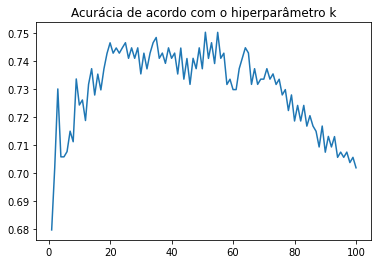

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.plot(pd.DataFrame(grid_search_KNN)['k'], pd.DataFrame(grid_search_KNN)['cv_score'])
plt.title('Acurácia de acordo com o hiperparâmetro k')
plt.show()

## Aplicação com os hiperparâmetros escolhidos

In [ ]:
k = pd.DataFrame(grid_search_KNN)[['cv_score', 'k']].sort_values('cv_score',ascending=False)['k']
k = k[k.index[0]]
knn = KNNClassifier(n_neighbors=k)
knn.fit(X_train,y_train.ravel())
prediction = knn.predict(X_test)
k

51

## Acurácia - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.7705627705627706
F1 Score = 0.5391304347826087
Precision = 0.4189189189189189


## Matrix de confusão

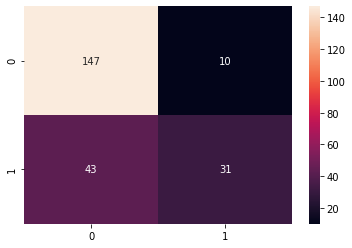

[[147  10]
 [ 43  31]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       157
           1       0.76      0.42      0.54        74

    accuracy                           0.77       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.77      0.77      0.75       231



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.2889908256880734


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.2889908256880734


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.5375786693015948


# KNN com sklearn

## Grid Search

### do zero

In [ ]:
k = [i for i in range(1,101)]

grid_search_KNN = []

for k_val in k:
    cv_score = kfoldcv(KNeighborsClassifier(n_neighbors=k_val), X_train, y_train.ravel(), cv=5).mean()
    grid_search_KNN.append({'cv_score':cv_score, 'k':k_val})

In [ ]:
pd.DataFrame(grid_search_KNN)[['cv_score', 'k']].sort_values('cv_score',ascending=False)

,cv_score,k
4,0.758882,5
10,0.756902,11
20,0.754999,21
22,0.754980,23
18,0.754960,19
...,...,...
99,0.729140,100
94,0.729140,95
93,0.727160,94
1,0.707474,2


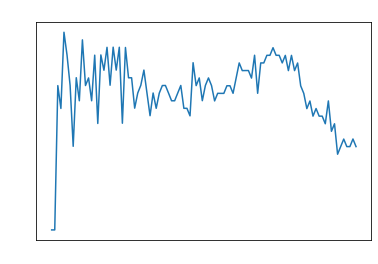

In [ ]:
plt.plot(pd.DataFrame(grid_search_KNN)['k'], pd.DataFrame(grid_search_KNN)['cv_score'])
plt.title('Acurácia de acordo com o hiperparâmetro k')
plt.show()

### com o sklearn

In [ ]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors':[i for i in range(1, 101)],
    
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train.ravel())

pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,{'n_neighbors': 5},0.756902,1
20,{'n_neighbors': 21},0.752980,2
5,{'n_neighbors': 6},0.752922,3
18,{'n_neighbors': 19},0.750980,4
17,{'n_neighbors': 18},0.749078,5
...,...,...,...
8,{'n_neighbors': 9},0.731178,96
99,{'n_neighbors': 100},0.727237,97
7,{'n_neighbors': 8},0.727218,98
1,{'n_neighbors': 2},0.707552,99


## Random Search

In [ ]:
clfRS = RandomizedSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors':[i for i in range(1, 101)]},
    cv=5,
    return_train_score=False, 
    n_iter=4)

clfRS.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,


In [ ]:
clfRS.best_score_, clfRS.best_params_

(0.7430596000776548, {'n_neighbors': 70})

In [ ]:
pd.DataFrame(clfRS.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 70},0.743060,1
3,{'n_neighbors': 52},0.741079,2
1,{'n_neighbors': 28},0.739119,3
2,{'n_neighbors': 96},0.731198,4


## Aplicação com os hiperparâmetros escolhidos

In [ ]:
k = pd.DataFrame(clf.cv_results_).sort_values('rank_test_score')['param_n_neighbors']
k = k[k.index[0]]
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)
print(k)

5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Acurácia - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.7110091743119266
F1 Score = 0.5827814569536424
Precision = 0.5945945945945946


## Matrix de confusão

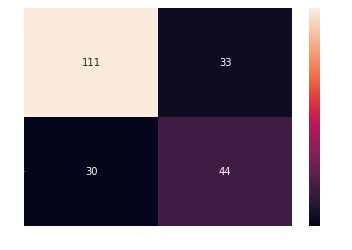

[[111  33]
 [ 30  44]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification Report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       144
           1       0.57      0.59      0.58        74

    accuracy                           0.71       218
   macro avg       0.68      0.68      0.68       218
weighted avg       0.71      0.71      0.71       218



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.2889908256880734


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.2889908256880734


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.5375786693015948


# SVM

In [ ]:
'''
HIPERPARÂMETROS:  
  C, 
  gamma ('scale', 'auto'), 
  kernel ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
'''

"\nHIPERPARÂMETROS:  \n  C, \n  gamma ('scale', 'auto'), \n  kernel ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')\n"

## Grid Search

### do zero

In [ ]:
c_svm_list = [1 ,10, 20, 30]
kernel_svm_list = ['linear', 'rbf', 'poly']  #, 'sigmoid']

grid_search_svm = []

for c_val in c_svm_list:
    for kernel_val in kernel_svm_list:
        cv_score = kfoldcv(svm.SVC(C=c_val, kernel=kernel_val,  gamma='auto'), X_train, y_train.ravel(), cv=5).mean()
        print(cv_score)
        grid_search_svm.append({
            'cv_scores':cv_score,
            'c':c_val,
            'kernel':kernel_val
        })

0.7647252960590176
0.7371190060182489
0.7292370413511939
0.7627645117452921
0.7134342846049311
0.7331780236847214
0.7627645117452921
0.7035527082119977
0.7331586099786449
0.7627645117452921
0.7074548631333722
0.7351388079984469


In [ ]:
pd.DataFrame(grid_search_svm)[['cv_scores', 'c', 'kernel']].sort_values('cv_scores', ascending=False)

,cv_scores,c,kernel
0,0.764725,1,linear
3,0.762765,10,linear
6,0.762765,20,linear
9,0.762765,30,linear
1,0.737119,1,rbf
11,0.735139,30,poly
5,0.733178,10,poly
8,0.733159,20,poly
2,0.729237,1,poly
4,0.713434,10,rbf


### com o sklearn

In [ ]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C':[i for i in range(1, 51)],
    'kernel':['linear', 'rbf', 'poly', 'sigmoid']
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_score_, clf.best_params_

(0.7647641234711706, {'C': 1, 'kernel': 'linear'})

In [ ]:
pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.764764,1
140,"{'C': 36, 'kernel': 'linear'}",0.764764,1
40,"{'C': 11, 'kernel': 'linear'}",0.764764,1
112,"{'C': 29, 'kernel': 'linear'}",0.764764,1
44,"{'C': 12, 'kernel': 'linear'}",0.764764,1
...,...,...,...
107,"{'C': 27, 'kernel': 'sigmoid'}",0.691672,196
193,"{'C': 49, 'kernel': 'rbf'}",0.691672,196
131,"{'C': 33, 'kernel': 'sigmoid'}",0.691672,196
197,"{'C': 50, 'kernel': 'rbf'}",0.689691,199


## Random Search

In [ ]:
clfRS = RandomizedSearchCV(
    svm.SVC(gamma='auto'),
    {'C':[1 ,10, 20, 30],
    'kernel':['linear', 'rbf', 'poly']},
    cv=5,
    return_train_score=False, 
    n_iter=4)

clfRS.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'C': [1, 10, 20, 30],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
clfRS.best_score_, clfRS.best_params_

(0.7647641234711706, {'C': 20, 'kernel': 'linear'})

In [ ]:
pd.DataFrame(clfRS.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'kernel': 'linear', 'C': 20}",0.764764,1
2,"{'kernel': 'poly', 'C': 30}",0.725218,2
3,"{'kernel': 'rbf', 'C': 10}",0.721316,3
1,"{'kernel': 'rbf', 'C': 30}",0.699553,4


## Aplicação com os hiperparâmetros escolhidos

In [ ]:
c = pd.DataFrame(grid_search_svm)[['cv_scores', 'c', 'kernel']].sort_values('cv_scores', ascending=False)['c']
c = c[c.index[0]]
kernel = pd.DataFrame(grid_search_svm)[['cv_scores', 'c', 'kernel']].sort_values('cv_scores', ascending=False)['kernel']
kernel = kernel[kernel.index[0]]

svm = svm.SVC(c,kernel,gamma='scale')
svm.fit(X_train,y_train.ravel())
prediction = svm.predict(X_test)
print(c)
print(kernel)

1
linear


## Acurácia - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.7835497835497836
F1 Score = 0.6153846153846154
Precision = 0.5405405405405406


## Matrix de confusão

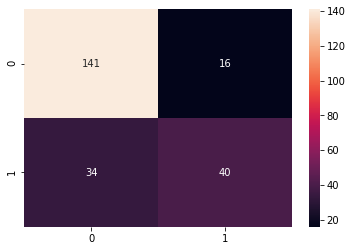

[[141  16]
 [ 34  40]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       144
           1       0.66      0.66      0.66        74

    accuracy                           0.77       218
   macro avg       0.74      0.74      0.74       218
weighted avg       0.77      0.77      0.77       218



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.22935779816513763


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.22935779816513763


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.4789131426105757


# Árvore de decisão

In [ ]:
'''
PARÂMETROS:
  criterion=gini, entropy
'''

'\nPARÂMETROS:\n  criterion=gini, entropy\n'

## Grid Search

### do zero

In [ ]:
criterion_list = ['entropy', 'gini']

grid_search_tree = []

for criterion_val in criterion_list:
  cv_score = kfoldcv(DecisionTreeClassifier(criterion=criterion_val,random_state=0), X_train, y_train.ravel(), cv=5).mean()
  grid_search_tree.append({
      'cv_scores':cv_score,
      'criterion':criterion_val
  })

In [ ]:
pd.DataFrame(grid_search_tree)[['cv_scores', 'criterion']].sort_values('cv_scores', ascending=False)

,cv_scores,criterion
1,0.687789,gini
0,0.679674,entropy


### com sklearn

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), {
    'criterion':['entropy', 'gini']
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_d

In [ ]:
clf.best_score_, clf.best_params_

(0.6917103475053388, {'criterion': 'gini'})

In [ ]:
pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,{'criterion': 'gini'},0.691710,1
0,{'criterion': 'entropy'},0.675985,2


## Aplicação com os hiperparâmetros escolhidos

In [ ]:
criterion = pd.DataFrame(grid_search_tree)[['cv_scores', 'criterion']].sort_values('cv_scores', ascending=False)['criterion']
criterion = criterion[criterion.index[0]]


model = DecisionTreeClassifier(criterion,random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(criterion)

gini


## Acurácia - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.6605504587155964
F1 Score = 0.5432098765432098
Precision = 0.5945945945945946


## Matrix de confusão

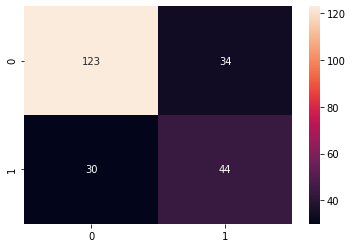

[[123  34]
 [ 30  44]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       144
           1       0.50      0.61      0.55        74

    accuracy                           0.66       218
   macro avg       0.64      0.65      0.64       218
weighted avg       0.68      0.66      0.67       218



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.3440366972477064


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.3440366972477064


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.5865464152543313


# Random forest

## Grid Search

### do zero

In [ ]:
n_estimators_list = [i for i in range(2, 101)]
criterion_list = ['entropy', 'gini']

grid_search_random = []

for n_estimators_val in n_estimators_list:
  for criterion_val in criterion_list:
    cv_score = kfoldcv(RandomForestClassifier(n_estimators=n_estimators_val, criterion=criterion_val,random_state=0), X_train, y_train.ravel(), cv=5).mean()
    grid_search_random.append({
        'cv_scores':cv_score,
        'criterion':criterion_val,
        'n_estimators':n_estimators_val
    })

In [ ]:
pd.DataFrame(grid_search_random)[['cv_scores', 'n_estimators', 'criterion']].sort_values('cv_scores', ascending=False)

,cv_scores,n_estimators,criterion
22,0.782547,13,entropy
30,0.776606,17,entropy
79,0.772685,41,gini
75,0.772685,39,gini
54,0.772666,29,entropy
...,...,...,...
84,0.743040,44,entropy
90,0.741060,47,entropy
3,0.739138,3,gini
1,0.715279,2,gini


### com sklearn

In [ ]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), {
    'n_estimators':[i for i in range(5, 101, 5)],
    'criterion':['gini', 'entropy']
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
clf.best_score_, clf.best_params_

(0.7688021743350806, {'criterion': 'entropy', 'n_estimators': 55})

In [ ]:
pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
30,"{'criterion': 'entropy', 'n_estimators': 55}",0.768802,1
33,"{'criterion': 'entropy', 'n_estimators': 70}",0.766861,2
36,"{'criterion': 'entropy', 'n_estimators': 85}",0.764900,3
35,"{'criterion': 'entropy', 'n_estimators': 80}",0.762920,4
34,"{'criterion': 'entropy', 'n_estimators': 75}",0.762920,4
32,"{'criterion': 'entropy', 'n_estimators': 65}",0.762920,4
31,"{'criterion': 'entropy', 'n_estimators': 60}",0.762920,4
24,"{'criterion': 'entropy', 'n_estimators': 25}",0.762920,4
39,"{'criterion': 'entropy', 'n_estimators': 100}",0.762900,9
37,"{'criterion': 'entropy', 'n_estimators': 90}",0.762881,10


## Random Search

In [ ]:
clfRS = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators':[i for i in range(5, 101, 5)],
    'criterion':['gini', 'entropy']},
    cv=5,
    return_train_score=False, 
    n_iter=10)

clfRS.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
clfRS.best_score_, clfRS.best_params_

(0.7609202096680254, {'criterion': 'entropy', 'n_estimators': 15})

In [ ]:
pd.DataFrame(clfRS.cv_results_)[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 15, 'criterion': 'entropy'}",0.760920,1
8,"{'n_estimators': 35, 'criterion': 'entropy'}",0.758921,2
2,"{'n_estimators': 95, 'criterion': 'gini'}",0.756960,3
6,"{'n_estimators': 65, 'criterion': 'entropy'}",0.754999,4
7,"{'n_estimators': 30, 'criterion': 'gini'}",0.754999,4
3,"{'n_estimators': 65, 'criterion': 'gini'}",0.754960,6
1,"{'n_estimators': 100, 'criterion': 'entropy'}",0.751039,7
9,"{'n_estimators': 20, 'criterion': 'gini'}",0.745040,8
0,"{'n_estimators': 5, 'criterion': 'gini'}",0.741157,9
5,"{'n_estimators': 55, 'criterion': 'entropy'}",0.741138,10


## Aplicação com os hiperparâmetros escolhidos

In [ ]:
n_estimators = pd.DataFrame(grid_search_random)[['cv_scores', 'n_estimators', 'criterion']].sort_values('cv_scores', ascending=False)['n_estimators']
n_estimators = n_estimators[n_estimators.index[0]]
criterion = pd.DataFrame(grid_search_random)[['cv_scores', 'n_estimators', 'criterion']].sort_values('cv_scores', ascending=False)['criterion']
criterion = criterion[criterion.index[0]]



model = RandomForestClassifier(n_estimators, criterion, verbose=False,random_state=0)
model.fit(X_train, y_train.ravel())
prediction = model.predict(X_test)
print(n_estimators)
print(criterion)

13
entropy


## Acurácia  - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.7619047619047619
F1 Score = 0.5736434108527131
Precision = 0.5


## Matrix de confusão

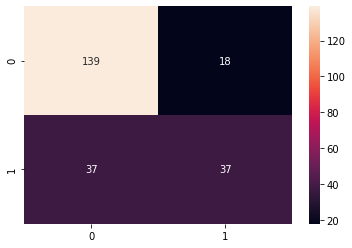

[[139  18]
 [ 37  37]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       144
           1       0.60      0.64      0.62        74

    accuracy                           0.73       218
   macro avg       0.70      0.71      0.71       218
weighted avg       0.74      0.73      0.74       218



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.26146788990825687


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.26146788990825687


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.5113393099579348


# Regressão Logistica

In [ ]:
#Tipo de regressão 
# 1 - GD
# 2 - GDE


class LogisticRegression(object):
  def __init__(self, alpha , epoch,regression_type , w, degree=1 ):
    self.w = w
    self.alpha = alpha
    self.epoch = epoch
    self.degree = degree
    self.X_train = alpha
    self.y_train = alpha
    self.regression_type = regression_type

#Executa o modelo
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
    if (self.regression_type == 1):
      w_predict , custo = self.gd()
    elif (self.regression_type == 2):
      w_predict , custo = self.sgd()
    self.w = w_predict

#Faz a predição do y baseado no w e sigmoid
  def predict(self, X_test):
    threshold=0.5
    y_pred = np.array([])
    X_test_polynomial =  self.polynomialX(X_test , self.degree)
    p =  self.sigmoid(X_test_polynomial @ self.w.T) >= threshold
    y_pred = np.append(y_pred,(p.astype('int')))
    return y_pred

#definição da função sigmoid
  def sigmoid(self,z):
    return 1 / ( 1 + np.exp(-z))

#Transformar o X em polinomial
  def polynomialX(self ,X, degree = 1):
    features = X.shape[1]
    x_polynomial = X
    for i in range(features):
      for j in range(2, degree + 1):
        columns_power = np.power(X[:,i],j)
        x_polynomial = np.append(x_polynomial , columns_power.reshape((len(columns_power),1)), axis=1)
    return x_polynomial


#Definição da função custo
  def cross_entropy_loss(self, w):
    N = len(self.X_train.shape) 
    return np.sum(np.multiply(-self.y_train , np.log(self.sigmoid(self.X_train @ w.T))) - np.multiply(1 - self.y_train, np.log(1 - self.sigmoid( self.X_train @ w.T))))/N

#Gradiente descendente Logistico
  def gd(self):
    self.X_train = self.polynomialX(self.X_train , self.degree) 
    w = np.random.rand(1,self.X_train.shape[1])
    custo = np.zeros(self.epoch)
    for i in range(self.epoch):
      w = w - (self.alpha/len(self.X_train)) * np.sum((self.sigmoid(self.X_train @ w.T) - self.y_train) * self.X_train , axis=0) 
      custo[i] = self.cross_entropy_loss(w)
    self.w = w
    return w, custo

#Embaralhar os dados
  def shuffle(self):
    assert len(self.X_train) == len(self.y_train)
    p = np.random.permutation(len(self.X_train))
    return self.X_train[p], self.y_train[p]

#Gradiente descendente estocastico Logistico
  def sgd(self):
    custo = np.zeros(self.epoch)
    N = len(self.X_train)
    self.X_train = self.polynomialX(self.X_train , self.degree) 
    w = np.random.rand(1,self.X_train.shape[1])
    for i in range(self.epoch):
      for j in range(N):
        w = w + self.alpha * (self.y_train[j] - self.sigmoid(self.X_train[j] @ w.T)) * self.X_train[j]
      custo[i] = self.cross_entropy_loss(w)
      self.shuffle()
    self.w = w
    return w, custo




## Grid Search

In [ ]:
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

w = np.random.rand(1,n_features+1) ## valores entre 0 e 1
w = np.random.rand(1,X_train.shape[1])

In [ ]:
alpha = [0.01 , 0.001 , 0.0001]
degree = [i for i in range(1,6)]

grid_search = np.array(np.meshgrid(alpha, # alpha
                          degree)).T.reshape(-1,2) # degree
grid_search                                                                       

array([[1.e-02, 1.e+00],
       [1.e-02, 2.e+00],
       [1.e-02, 3.e+00],
       [1.e-02, 4.e+00],
       [1.e-02, 5.e+00],
       [1.e-03, 1.e+00],
       [1.e-03, 2.e+00],
       [1.e-03, 3.e+00],
       [1.e-03, 4.e+00],
       [1.e-03, 5.e+00],
       [1.e-04, 1.e+00],
       [1.e-04, 2.e+00],
       [1.e-04, 3.e+00],
       [1.e-04, 4.e+00],
       [1.e-04, 5.e+00]])

In [ ]:
ResultsGD = []
ResultsSGD = []

for i in range(len(grid_search)):
  cv_score = kfoldcv(LogisticRegression(grid_search[i][0],10000, 1, w, int(grid_search[i][1])), X_train, y_train, cv=5).mean()
  ResultsGD.append({'cv_score':cv_score, 'alpha':grid_search[i][0], 'degree':int(grid_search[i][1])})
  #cv_score = kfoldcv(LogisticRegression(grid_search[i][0],10000, 2, w, int(grid_search[i][1])), X_train, y_train, cv=5).mean()
  #ResultsSGD.append({'cv_score':cv_score, 'alpha':grid_search[i][0], 'degree':int(grid_search[i][1])})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


In [ ]:
pd.DataFrame(ResultsGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)

,cv_score,alpha,degree
7,0.782547,0.0010,3
5,0.778606,0.0010,1
1,0.772646,0.0100,2
2,0.766744,0.0100,3
0,0.762765,0.0100,1
3,0.756882,0.0100,4
6,0.754863,0.0010,2
8,0.750883,0.0010,4
9,0.748981,0.0010,5
4,0.731198,0.0100,5


In [ ]:
#pd.DataFrame(ResultsSGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)

## Aplicação com os hiperparâmetros escolhidos

In [ ]:
alphaGD = pd.DataFrame(ResultsGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)['alpha']
alphaGD = alphaGD[alphaGD.index[0]]
degreeGD = pd.DataFrame(ResultsGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)['degree']
degreeGD = degreeGD[degreeGD.index[0]]

logreg_gd = LogisticRegression(alphaGD,10000, 1, w, degreeGD)
logreg_gd.fit(X_train,y_train)
prediction = logreg_gd.predict(X_test)
print(alphaGD)
print(degreeGD)

In [ ]:
#alphaSGD = pd.DataFrame(ResultsSGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)['alpha']
#alphaSGD = alphaSGD[alphaSGD.index[0]]
#degreeSGD = pd.DataFrame(ResultsSGD)[['cv_score', 'alpha', 'degree']].sort_values('cv_score',ascending=False)['degree']
#degreeSGD = degreeSGD[degreeSGD.index[0]]

#logreg_sgd = LogisticRegression(alphaSGD,10000, 2, w, degreeSGD)
#logreg_sgd.fit(X_train,y_train)
#predictionsgd = logreg_sgd.predict(X_test)

## Acurácia - Precision - F1 Score

In [ ]:
print("Accuracy =",metrics.accuracy_score(prediction, y_test))
print("F1 Score =",metrics.f1_score(prediction, y_test))
print("Precision =",metrics.precision_score(prediction, y_test))

Accuracy = 0.7662337662337663
F1 Score = 0.5781250000000001
Precision = 0.5


## Matrix de confusão

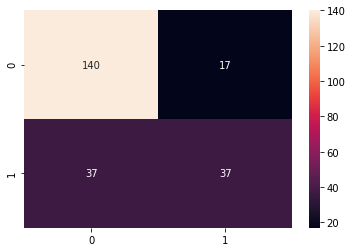

[[140  17]
 [ 37  37]]


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt='g')
plt.show()
print(metrics.confusion_matrix(y_test, prediction))

## Classification report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       144
           1       0.64      0.69      0.66        74

    accuracy                           0.76       218
   macro avg       0.74      0.74      0.74       218
weighted avg       0.77      0.76      0.76       218



## MAE (média dos erros absolutos)

In [ ]:
print('mae:', metrics.mean_absolute_error(y_test, prediction))

mae: 0.23853211009174313


## MSE (média dos erros ao quadrado)

In [ ]:
print('mse:', metrics.mean_squared_error(y_test, prediction))

mse: 0.23853211009174313


## RMSE (raiz da média dos erros ao quadrado)

In [ ]:
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

rmse: 0.48839749189747395


# Resultados

## Tabela

In [ ]:
data = {
    'acurácia':[0.7705627705627706, #'regressão logística sem tratamento'
                0.7614678899082569, #'regressão logística com tratamento'
                0.7359307359307359, #'knn sem normalização + sem tratamento'
                0.7614678899082569, #'knn sem normalização + com tratamento'
                0.7705627705627706, #'knn com normalização + sem tratamento'
                0.7110091743119266, #'knn com normalização + com tratamento'
                0.7229437229437229, #'árvore de decisão sem normalização + sem tratamento'
                0.6605504587155964, #'árvore de decisão sem normalização + com tratamento'
                0.7272727272727273, #'árvore de decisão com normalização + sem tratamento'
                0.6559633027522935, #'árvore de decisão com normalização + com tratamento'
                0.7835497835497836, #'svm sem tratamento'
                0.7706422018348624, #'svm com tratamento'
                0.7489177489177489, #'random forest sem normalização + sem tratamento'
                0.7339449541284404, #'random forest sem normalização + com tratamento'
                0.7619047619047619, #'random forest com normalização + sem tratamento'
                0.7385321100917431 #'random forest com normalização + com tratamento'
                ],
    
    'precision':[0.5945945945945946, #'regressão logística sem tratamento'
                0.6891891891891891, #'regressão logística com tratamento'
                0.3918918918918919, #'knn sem normalização + sem tratamento'
                0.5135135135135135, #'knn sem normalização + com tratamento'
                0.4189189189189189, #'knn com normalização + sem tratamento'
                0.5945945945945946, #'knn com normalização + com tratamento'
                0.5945945945945946, #'árvore de decisão sem normalização + sem tratamento'
                0.6081081081081081, #'árvore de decisão sem normalização + com tratamento'
                0.581081081081081, #'árvore de decisão com normalização + sem tratamento'
                0.5945945945945946, #'árvore de decisão com normalização + com tratamento'
                0.5405405405405406, #'svm sem tratamento'
                0.6621621621621622, #'svm com tratamento'
                0.47297297297297297, #'random forest sem normalização + sem tratamento'
                0.6351351351351351, #'random forest sem normalização + com tratamento'
                0.5, #'random forest com normalização + sem tratamento'
                0.6351351351351351 #'random forest com normalização + com tratamento'
                ],
    
    'f1-score':[0.624113475177305, #'regressão logística sem tratamento'
                0.6623376623376622, #'regressão logística com tratamento'
                0.4873949579831932, #'knn sem normalização + sem tratamento'
                0.59375, #'knn sem normalização + com tratamento'
                0.5391304347826087, #'knn com normalização + sem tratamento'
                0.5827814569536424, #'knn com normalização + com tratamento'
                0.5789473684210528, #'árvore de decisão sem normalização + sem tratamento'
                0.5487804878048781, #'árvore de decisão sem normalização + com tratamento'
                0.5771812080536912, #'árvore de decisão com normalização + sem tratamento'
                0.5398773006134969, #'árvore de decisão com normalização + com tratamento'
                0.6153846153846154, #'svm sem tratamento'
                0.6621621621621622, #'svm com tratamento'
                0.546875, #'random forest sem normalização + sem tratamento'
                0.6184210526315789, #'random forest sem normalização + com tratamento'
                0.5736434108527131, #'random forest com normalização + sem tratamento'
                0.6225165562913907 #'random forest com normalização + com tratamento'
                ],
    
    'matriz de confusão':[
                            [[134, 23], [30, 44]], #'regressão logística sem tratamento'
                            [[115, 29], [23, 51]], #'regressão logística com tratamento'
                            [[141, 16], [45, 29]], #'knn sem normalização + sem tratamento'
                            [[128, 16], [36, 38]], #'knn sem normalização + com tratamento'
                            [[147, 10], [43, 31]], #'knn com normalização + sem tratamento'
                            [[111, 33], [30, 44]], #'knn com normalização + com tratamento'
                            [[126, 31], [30, 44]], #'árvore de decisão sem normalização + sem tratamento'
                            [[99, 45], [29, 45]], #'árvore de decisão sem normalização + com tratamento'
                            [[125, 32], [31, 43]], #'árvore de decisão com normalização + sem tratamento'
                            [[99, 45], [30, 44]], #'árvore de decisão com normalização + com tratamento'
                            [[141, 16], [34, 40]], #'svm sem tratamento'
                            [[119, 25], [25, 49]], #'svm com tratamento'
                            [[138, 19], [39, 35]], #'random forest sem normalização + sem tratamento'
                            [[113, 31], [27, 47]], #'random forest sem normalização + com tratamento'
                            [[139, 18], [37, 37]], #'random forest com normalização + sem tratamento'
                            [[114, 30], [27, 47]] #'random forest com normalização + com tratamento'
                            ],
    
    'hiperparâmetros':[{'alpha':0.01,'degree':4}, #'regressão logística sem tratamento'
                        {'alpha':0.001,'degree':3}, #'regressão logística com tratamento'
                        {'k':18}, #'knn sem normalização + sem tratamento'
                        {'k':100}, #'knn sem normalização + com tratamento'
                        {'k':51}, #'knn com normalização + sem tratamento'
                        {'k':5}, #'knn com normalização + com tratamento'
                        {'criterion':'gini'}, #'árvore de decisão sem normalização + sem tratamento'
                        {'criterion':'gini'}, #'árvore de decisão sem normalização + com tratamento'
                        {'criterion':'entropy'}, #'árvore de decisão com normalização + sem tratamento'
                        {'criterion':'gini'}, #'árvore de decisão com normalização + com tratamento'
                        {'c':20, 'kernel':'linear'}, #'svm sem tratamento'
                        {'c':1, 'kernel':'linear'}, #'svm com tratamento'
                        {'n_estimators':22, 'criterion':'gini'}, #'random forest sem normalização + sem tratamento'
                        {'n_estimators':13, 'criterion':'entropy'}, #'random forest sem normalização + com tratamento'
                        {'n_estimators':30, 'criterion':'gini'}, #'random forest com normalização + sem tratamento'
                        {'n_estimators':13, 'criterion':'entropy'} #'random forest com normalização + com tratamento'
                        ]
    }
  
table = pd.DataFrame(data, index =['regressão logística sem tratamento',
                           'regressão logística com tratamento',
                           'knn sem normalização + sem tratamento',
                           'knn sem normalização + com tratamento',
                           'knn com normalização + sem tratamento',
                           'knn com normalização + com tratamento',
                           'árvore de decisão sem normalização + sem tratamento',
                           'árvore de decisão sem normalização + com tratamento',
                           'árvore de decisão com normalização + sem tratamento',
                           'árvore de decisão com normalização + com tratamento',
                           'svm sem tratamento',
                           'svm com tratamento',
                           'random forest sem normalização + sem tratamento',
                           'random forest sem normalização + com tratamento',
                           'random forest com normalização + sem tratamento',
                           'random forest com normalização + com tratamento'
                           ])

In [ ]:
table.sort_values('acurácia',ascending=False)

,acurácia,precision,f1-score,matriz de confusão,hiperparâmetros
svm sem tratamento,0.783550,0.540541,0.615385,"[[141, 16], [34, 40]]","{'c': 20, 'kernel': 'linear'}"
svm com tratamento,0.770642,0.662162,0.662162,"[[119, 25], [25, 49]]","{'c': 1, 'kernel': 'linear'}"
regressão logística sem tratamento,0.770563,0.594595,0.624113,"[[134, 23], [30, 44]]","{'alpha': 0.01, 'degree': 4}"
knn com normalização + sem tratamento,0.770563,0.418919,0.539130,"[[147, 10], [43, 31]]",{'k': 51}
random forest com normalização + sem tratamento,0.761905,0.500000,0.573643,"[[139, 18], [37, 37]]","{'n_estimators': 30, 'criterion': 'gini'}"
regressão logística com tratamento,0.761468,0.689189,0.662338,"[[115, 29], [23, 51]]","{'alpha': 0.001, 'degree': 3}"
knn sem normalização + com tratamento,0.761468,0.513514,0.593750,"[[128, 16], [36, 38]]",{'k': 100}
random forest sem normalização + sem tratamento,0.748918,0.472973,0.546875,"[[138, 19], [39, 35]]","{'n_estimators': 22, 'criterion': 'gini'}"
random forest com normalização + com tratamento,0.738532,0.635135,0.622517,"[[114, 30], [27, 47]]","{'n_estimators': 13, 'criterion': 'entropy'}"
knn sem normalização + sem tratamento,0.735931,0.391892,0.487395,"[[141, 16], [45, 29]]",{'k': 18}


## **Modelo com maior acurácia**

SVM com escalonamento + sem tratamento:

    c: 20
    kernel: linear
    acurácia: 78,35%

# Trabalhos Futuros:

- Adicionar recall
- Adicionar imputação via knn
- Melhorar os resultados por curva roc